# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 5. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**


* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 35 баллов за контест и 5 баллов за ноутбук
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 40 баллов

In [ ]:
# Bot check

# HW_ID: fpmi_ad5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status:  final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики, которые при необходимости можно доработать.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as sps
coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf

def uniform(size=1, precision=30):
    if type(size) is int:
        arr = 2.0 ** np.arange(-precision, 0)
        bernoulli = coin((size, precision))
        return np.sum(bernoulli * arr, axis=1) # Читабельное решение в одну строчку не выходя за границы? ;)
    else:
        arr = 2.0 ** np.arange(-precision, 0)
        axis = len(size)
        shape_1 = size + (precision,)
        bernoulli = coin(shape_1)
        shape_2 = size + (1,)
        arr_1 = np.tile(arr, shape_2)
        return np.sum(bernoulli * arr_1, axis=axis)

def plot_uniform_density(size=200):
    grid = np.linspace(-0.25, 1.25, 500) # равномерная сетка от -0.25 до 1.25 из 500 точек
    x = uniform(size)
    y = np.zeros(size)

    plt.figure(figsize=(20, 8))

    plt.hist(x, alpha=0.4, bins=10, density=True, label='Гистограмма случайной величины')
    plt.scatter(x=x, y=y, alpha=0.4, color='purple', label='Независимые случайные величины')
    plt.plot(grid, uniform_pdf(grid), alpha=0.4, color='red', lw=5, label='Плотность случайной величины')

    plt.title('Равномерное распределение', fontsize=25)
    plt.xlabel('Значение', fontsize=16)
    plt.ylabel('Плотность', fontsize=16)
    plt.legend()
    return plt.gcf()


def plot_uniform_different_precision(size=100):
    plt.figure(figsize=(20,10))
    plt.suptitle('Изменение значений случайных величин в зависимости от precision', fontsize=25)
    for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
        plt.subplot(3, 2, i + 1)

        plt.scatter(
            uniform(size, precision),
            np.zeros(size),
            alpha=0.4
        )

        plt.yticks(np.arange(-0.2, 0.2, step=0.1))
        if i < 4:
            plt.xticks(np.arange(0, 1, step=0.1))
        plt.xlabel('Значение выборки', fontsize=16)
        plt.title(f'Precision={precision}', fontsize=16)

    plt.subplots_adjust(hspace=0.7, wspace=0.5)
    return plt.gcf()


def normal(size=1, loc=0, scale=1, precision=30):
    arr1 = uniform(size, precision)
    arr2 = uniform(size, precision)
    b_m = np.sqrt(-2 * np.log(arr1)) * np.cos(2 * np.pi * arr2)
    x = loc + scale * b_m
    return x


def plot_normal_density(size=200):
    grid = np.linspace(-3, 3, 500)
    plt.figure(figsize=(20, 8))
    x = normal(size)
    y = np.zeros(size)

    plt.scatter(x=x, y=y, alpha=0.4, color='purple', label='Независимые случайные величины')
    plt.hist(x, bins=10, alpha=0.4, density=True, label='Гистограмма случайной величины')
    plt.plot(grid, norm_pdf(grid), alpha=0.4, color='red', lw=5, label='Плотность случайной величины')

    plt.title('Нормальное распределение', fontsize=25)
    plt.xlabel('Значение', fontsize=16)
    plt.ylabel('Плотность', fontsize=16)
    plt.legend()
    return plt.gcf()


def expon(size=1, lambd=1, precision=30):
    return np.log(uniform(size, precision)) * (-1) / lambd


def plot_expon_density(size=100):
    grid = np.linspace(-0.5, 5, 500)
    plt.figure(figsize=(20, 8))
    x = expon(size)
    y = np.zeros(size)

    plt.scatter(x=x, y=y, alpha=0.4, color='purple', label='Независимые случайные величины')
    plt.hist(x, bins=10, alpha=0.4, density=True, label='Гистограмма случайной величины')
    plt.plot(grid, expon_pdf(grid), alpha=0.4, color='red', lw=5, label='Плотность случайной величины')

    plt.title('Экспоненциальное распределение', fontsize=25)
    plt.xlabel('Значение', fontsize=16)
    plt.ylabel('Плотность', fontsize=16)
    plt.legend()
    return plt.gcf()




На графиках представлены:
1. Случайные величины, которые были получены функциями для генерации случайных величин.

2. Гистограмма: представляет распределение вероятности случайной величины. Ее столбцы отображают частоту появления значений случайной величины в каждом интервале. При написании функции указали параметр density=True, что  позволяет построить нормированную гистограмму (т.е. общая плошадь столбцов равна 1, это отбражает плотность вероятности в определенном интервале)
Гистограмма позволяет предугадать какое это распределение.

3. Плотность распределения: также графически изображает изменение распределения вероятности с измененем значения случайной величины.

Сравнение гистограммы и графика плотности может помочь понять характер распределения. Если гистограмма и график плотности похожи, то можно понять корректно ли определена форма распределения.




Выведем три графика разных распределений: равномерного, нормального и экспоненциального.



Равномерное распределение:

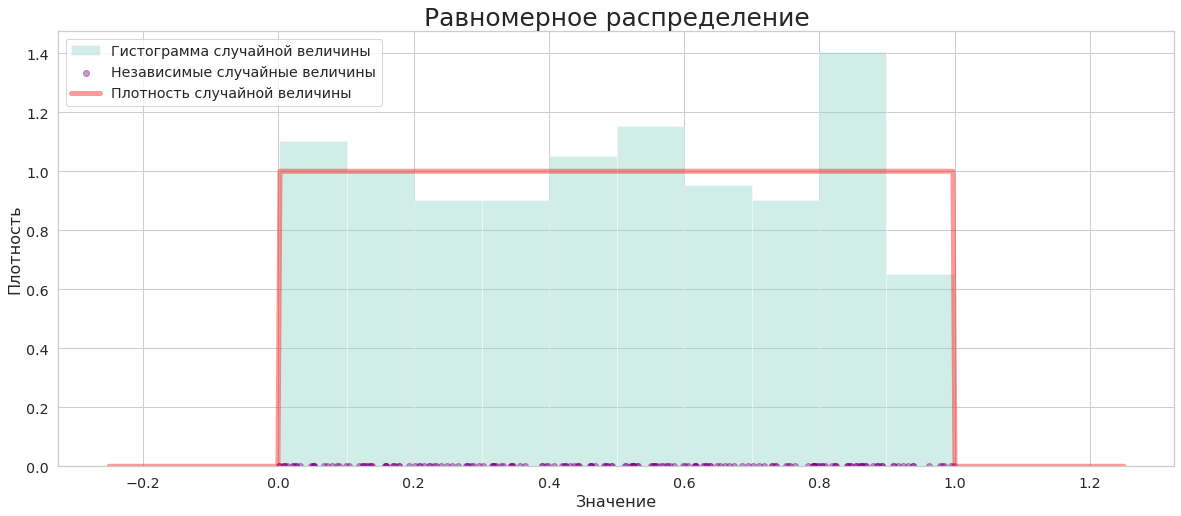

In [ ]:
figure = plot_uniform_density()

Гистограмма и график плотности похожи. Можно сделать вывод, что мы верно написали функцию uniform для генерации случайных величин из равномерного распределения с заданной точностью.


Теперь покажем, как меняются значения случайных величин в зависимости от разных precision:

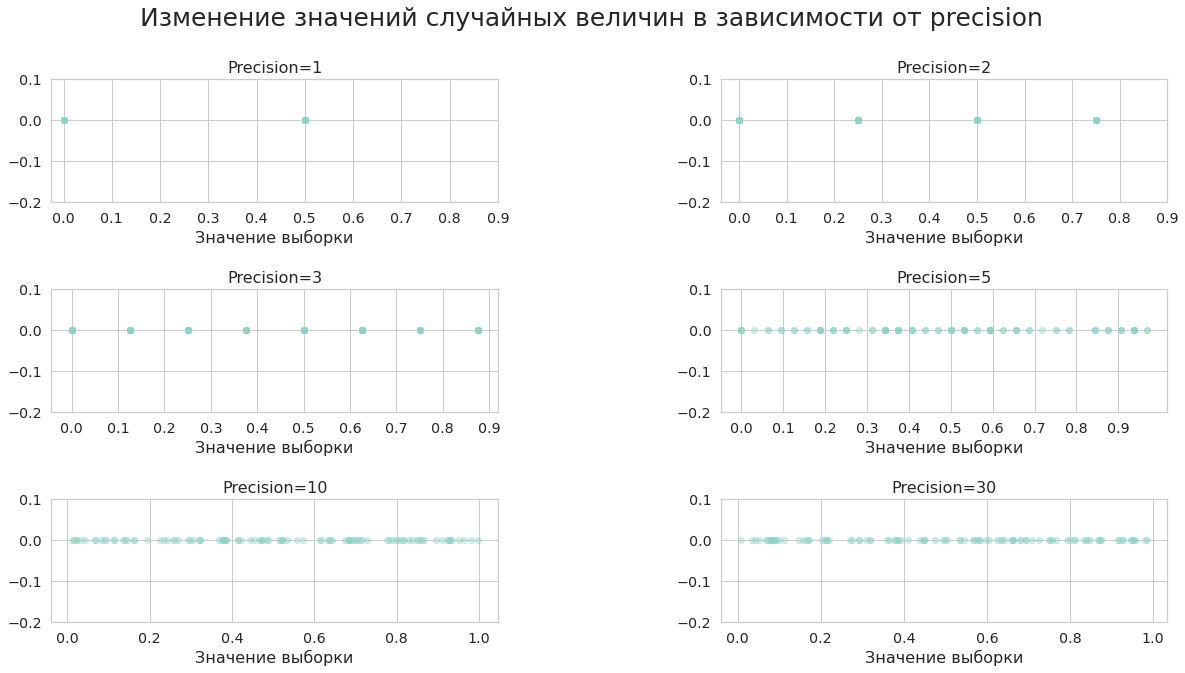

In [ ]:
figure = plot_uniform_different_precision()

Можно сделать вывод, что чем больше значение precision, тем более равномерно распределены случайные величины. Т.е. при увеличении precision сохраняется более точное представление распределения случайных величн.



Теперь рассмотрим нормальное распределение:


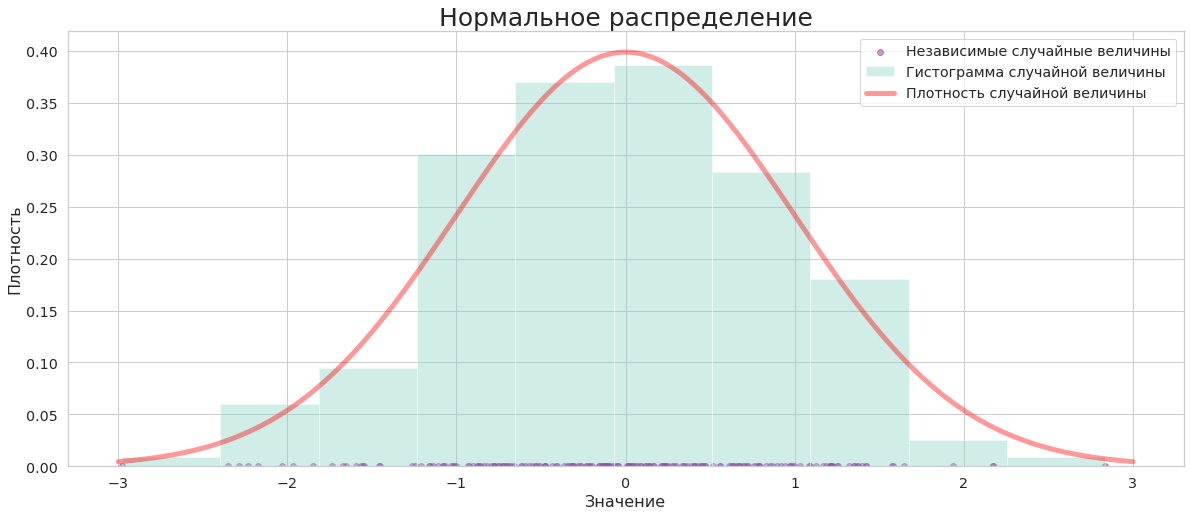

In [ ]:
figure = plot_normal_density()

Гистограмма и график плотности похожи. Можно сделать вывод, что мы верно написали функцию для генерации случайных величин из нормальноего распределения с помощью преобразования Бокса-Мюллера.


Теперь проверим реализацию функции для экспоненциального распределения:

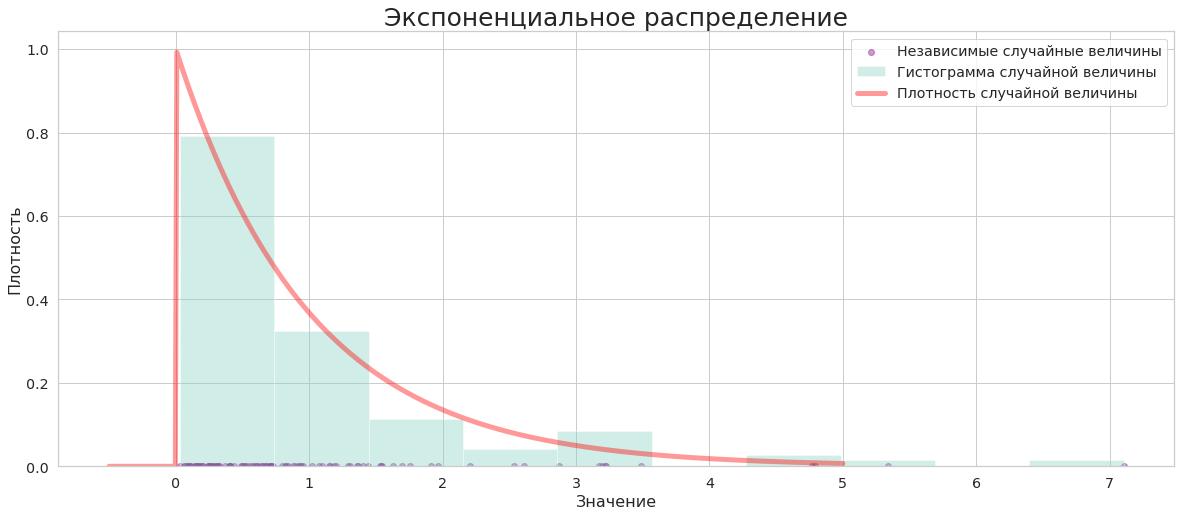

In [ ]:
figure = plot_expon_density()

Как и в предыдуших случаях, гистограмма и график плотности похожи. Значит верно реализована функция для генерации случайных величин из экспоненциального распределения.

**Выводы:**

1. Графики подтверждают правильность написания функций для генерации случайных величин из разных распределений: равномерного, нормального и экспоненциального.

2. Графически показали зависимость распределение случайных величин от precision. То есть чем выше значенние, тем более корректно представление распределения случайных величн.


---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

На графике видно, что плотность распределения Коши имеет "тяжелые" хвосты по сравнению с плотностью нормального распределения(из этого можно сделать вывод, что р-е Коши не имеет мат.ожидание и диспресию, так как сложно взять выборку при таких хвостах). График плотности распределения Коши имеет более медленную скорость убывания при отдалении от среднего значения.

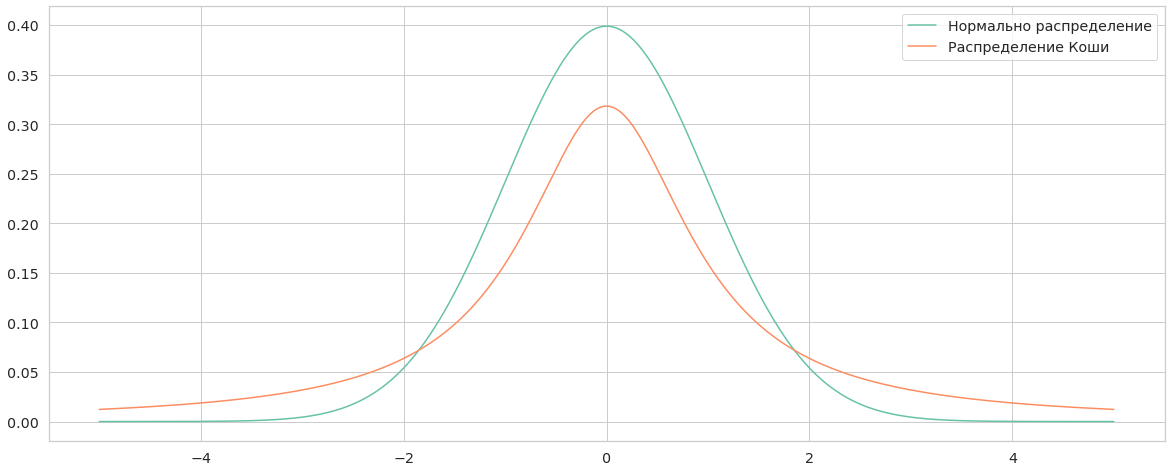

In [ ]:
plt.figure(figsize=(20,8))
x = np.linspace(-5, 5, num=750)

n_pdf = sps.norm.pdf(x)
plt.plot(x, n_pdf, label = 'Нормально распределение')


c_pdf = sps.cauchy.pdf(x)
plt.plot(x, c_pdf, label = 'Распределение Коши')
plt.legend();

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

Построим график сначала для одного эксперимента:

In [ ]:
size = 1000
sample = sps.cauchy.rvs(size = size)
means = sample.cumsum()/(np.arange(size) + 1)

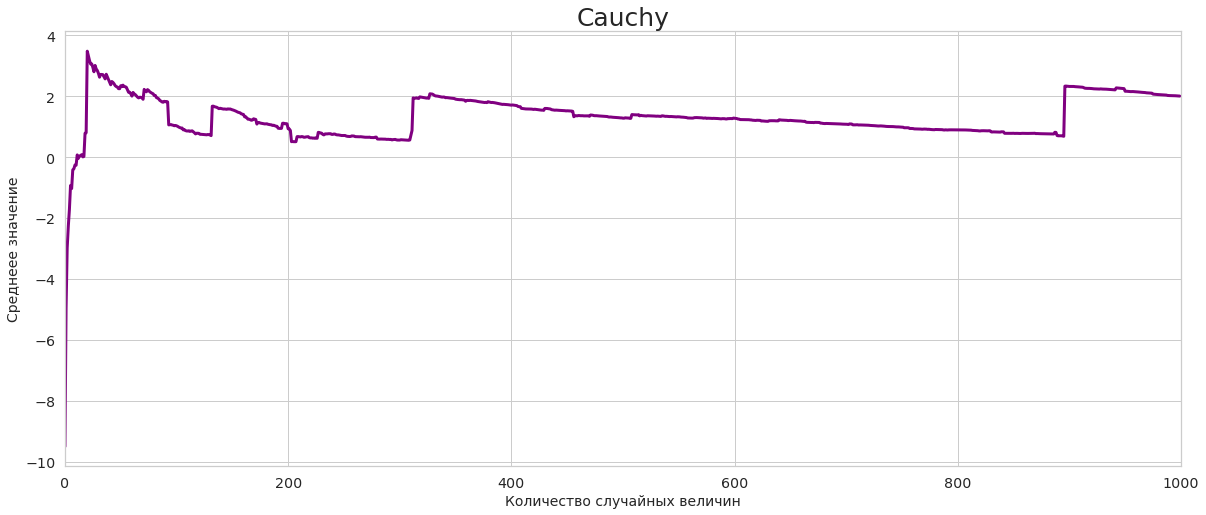

In [ ]:
plt.figure(figsize = (20,8))


plt.plot(means, color='purple', lw=3)
plt.xlim((0, size))

plt.xlabel('Количество случайных величин', fontsize=14)
plt.ylabel('Среднеее значение', fontsize=14)
plt.xlim((0, size))
plt.title('Cauchy', fontsize=25);


Но одного эксперимента мало, чтобы понять свойства вероятностных объектов.

Повторим жксперимент 10 раз независимо:

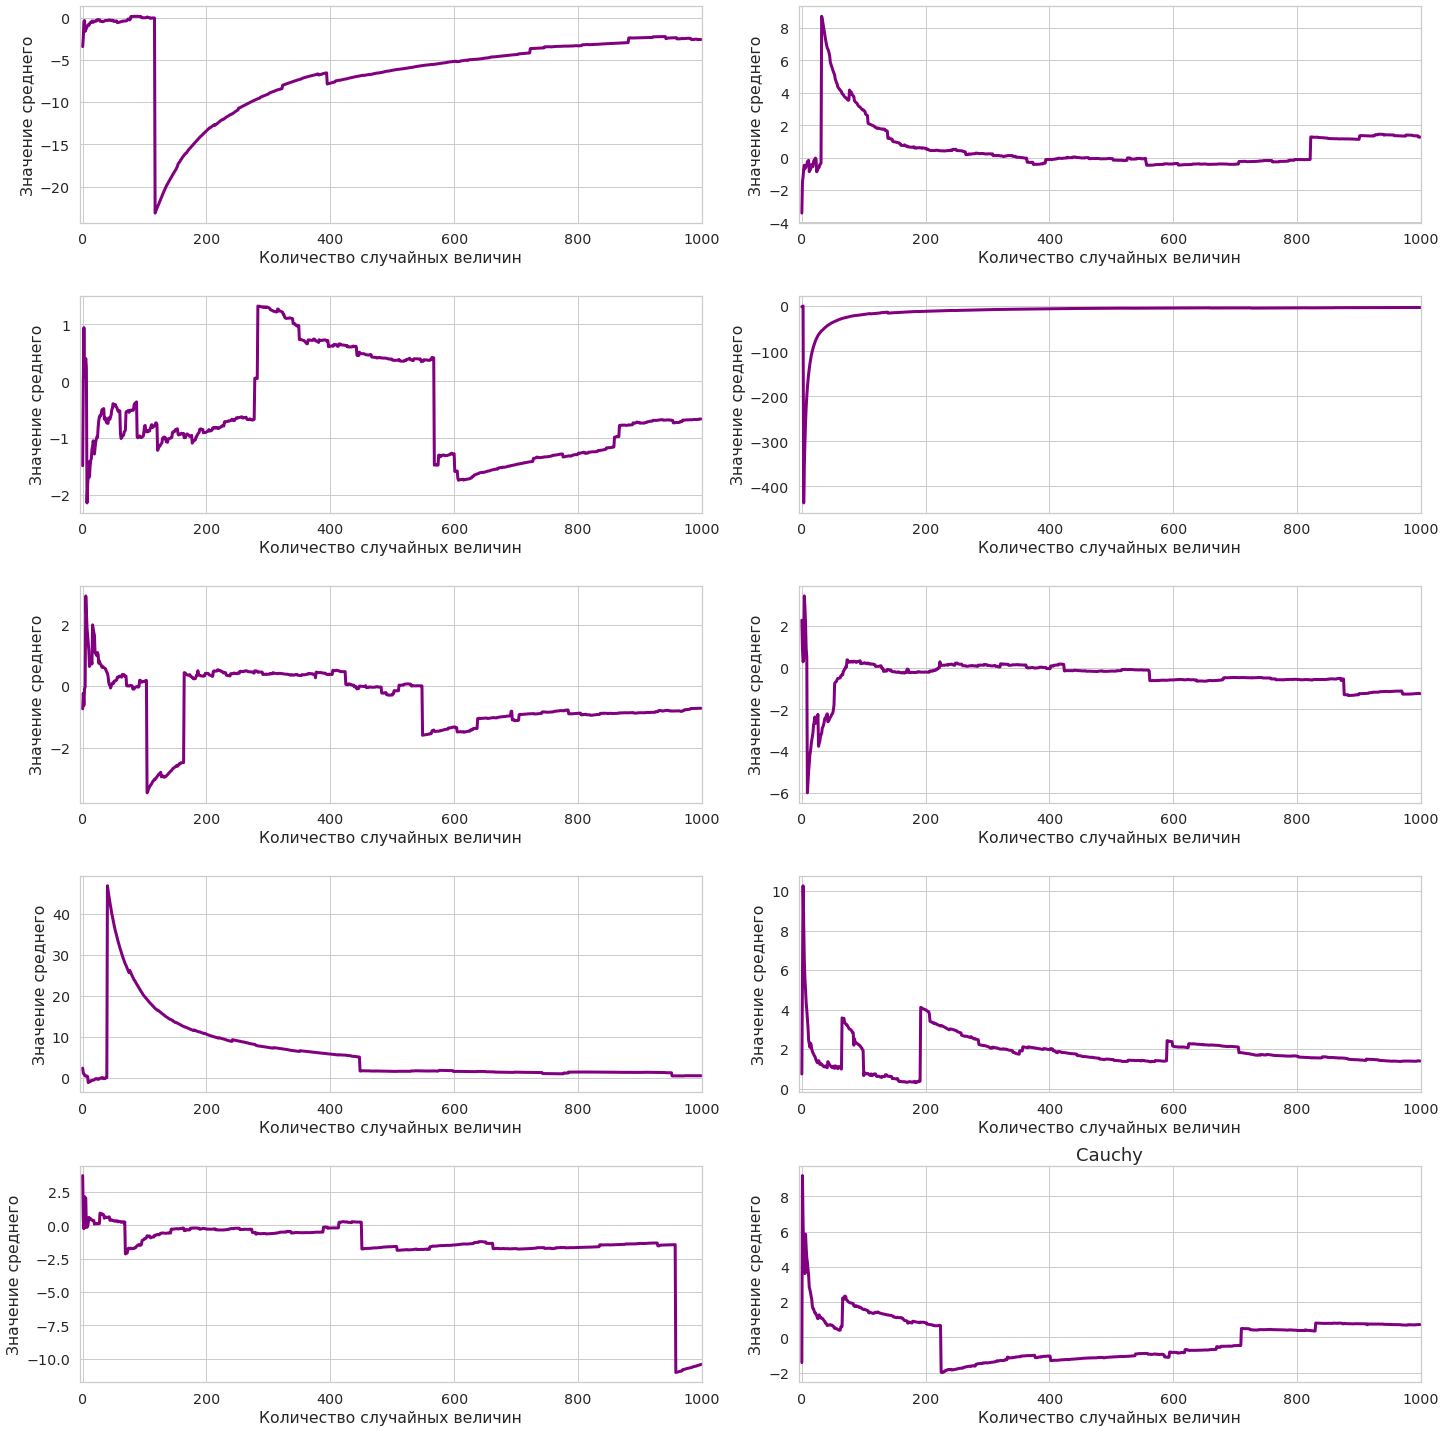

In [ ]:
plt.figure(figsize=(20, 20))

# эксперименты
for i in range(10):

    # Генерация выборки и вычисление средних
    size = 1000
    sample = sps.cauchy.rvs(size = size)
    means = sample.cumsum()/(np.arange(size) + 1)
    
    # График
    plt.subplot(5, 2, i+1)
    plt.plot(means, color='purple', lw=3)
    
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((-5, size))


plt.tight_layout();



Сгенерируем большое количество независимых наборов случайных величин и изобразим на одном графике:

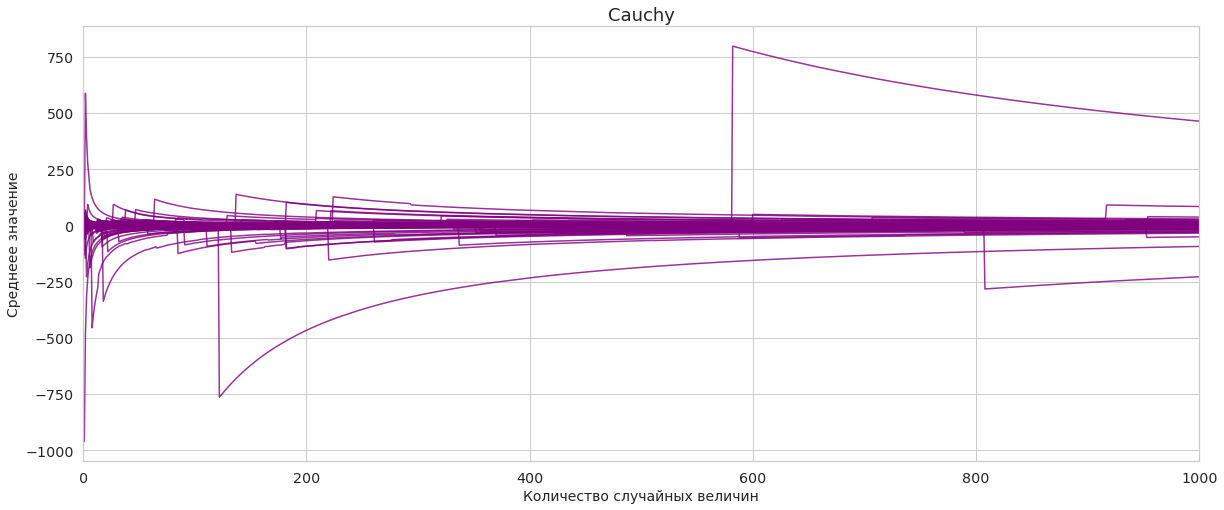

In [ ]:
size = 1000
samples_count = 500
sample = sps.cauchy.rvs(size = (samples_count, size))
means = sample.cumsum(axis=1)/(np.arange(size) + 1)

plt.figure(figsize = (20,8))
for i in range(samples_count):
  plt.plot(np.arange(size) + 1, means[i], color='purple', alpha=0.8)
plt.xlim((0, size))
axes = plt.gca()
axes.set_xlabel('Количество случайных величин', fontsize=14)
axes.set_ylabel('Среднеее значение', fontsize=14)

plt.title('Cauchy', fontsize=18);

Видно, что среднее не стремится к какому-либо одному числу. Так как даже при увеличении количества СВ есть выбивающиеся средние значения.

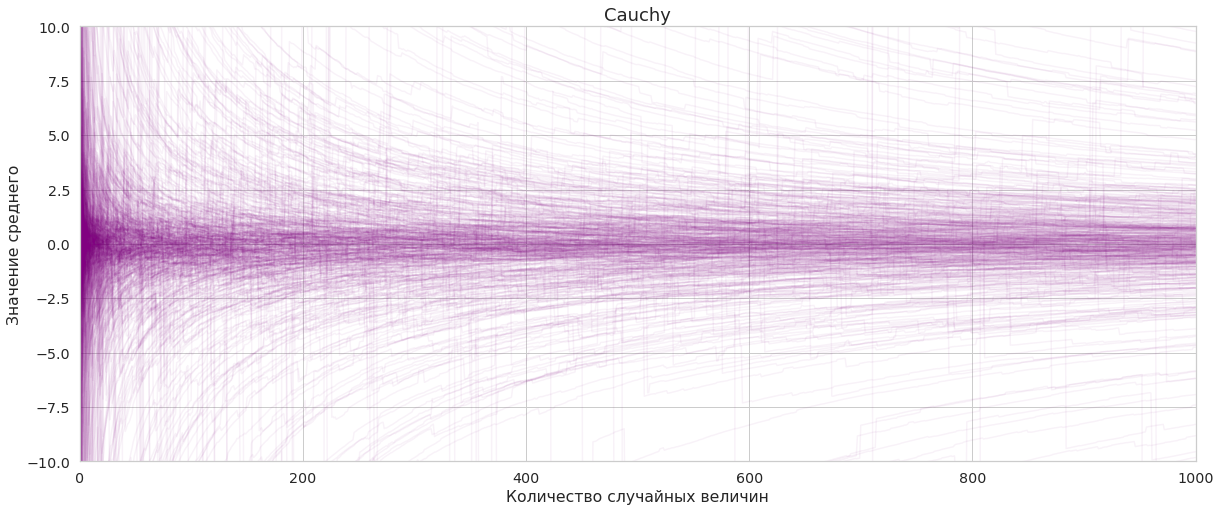

In [ ]:
plt.figure(figsize=(20, 8))

for i in range(samples_count):
    plt.plot(np.arange(size) + 1, means[i], color='purple', alpha=0.05)
plt.title('Cauchy', fontsize=16)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size))
plt.ylim((-10, 10))
plt.title('Cauchy', fontsize=18);

Можно предположить, что средние стремятся к 0. Но по графику видно, что есть значения, которые не близки к 0. Значит, не выполняется ЗБЧ.


Для сравнения можно построить для других распределений (код взят из конспекта):

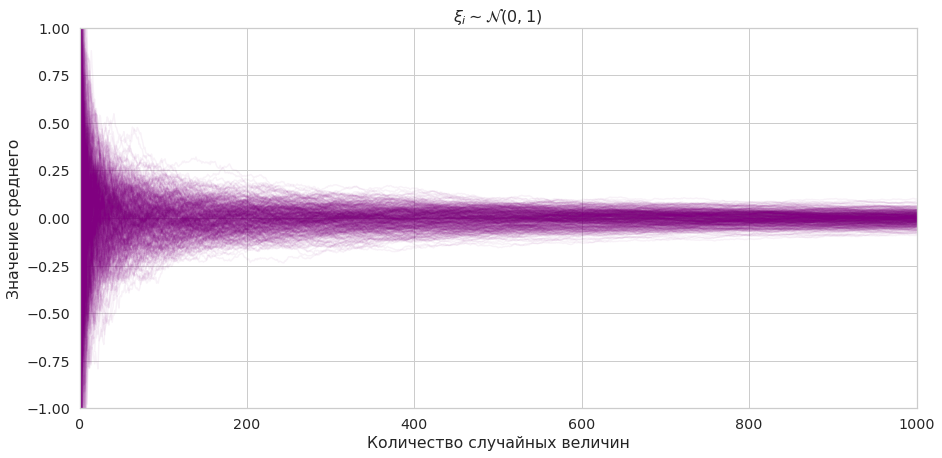

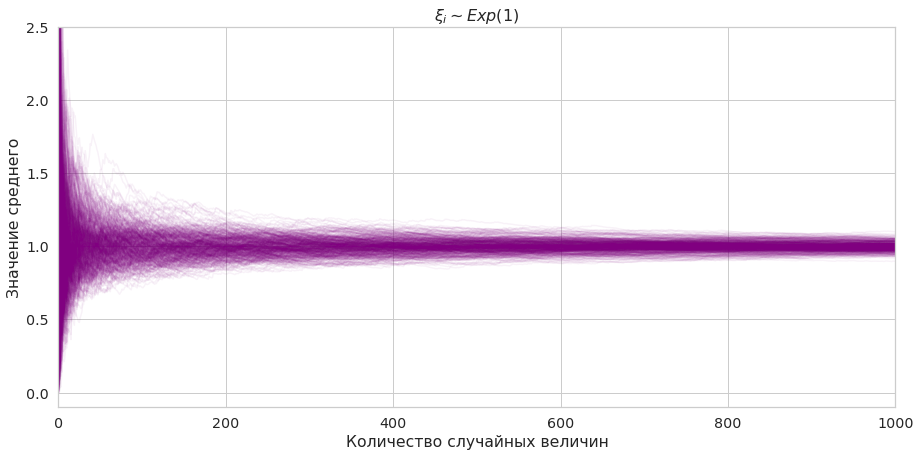

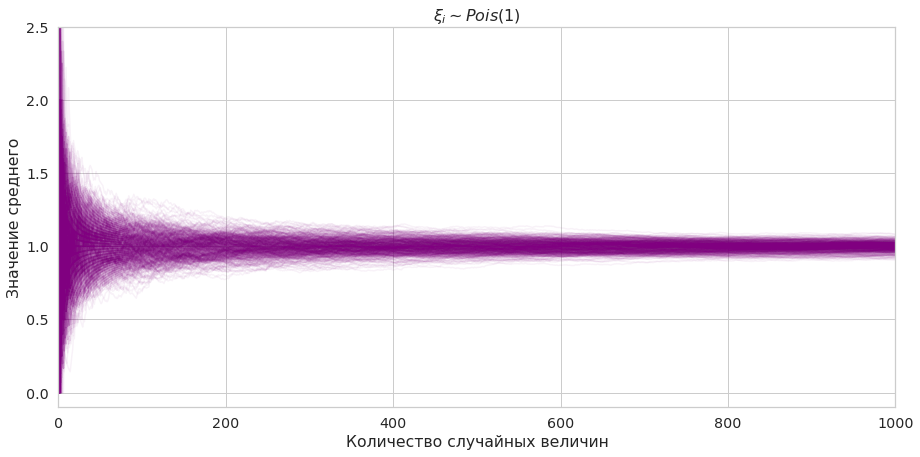

In [ ]:
size = 1000
samples_count = 500

for distr, ylim, label in zip(
    [sps.norm(), sps.expon(), sps.poisson(mu=1)], 
    [(-1, 1), (-0.1, 2.5), (-0.1, 2.5)],
    ['$\\mathcal{N}(0, 1)$', '$Exp(1)$', '$Pois(1)$']
):
    
    # Генерация выборки и вычисление средних
    samples = distr.rvs(size=(samples_count, size))
    cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

    # График
    plt.figure(figsize=(15, 7))
    for i in range(samples_count):
        plt.plot(np.arange(size) + 1, cum_means[i], color='purple', alpha=0.05)
    plt.title('$\\xi_i \\sim ' + label[1:], fontsize=16)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((0, size));
    plt.ylim(ylim)
    plt.show()

Видны явные различия графиков других распределений, для которых выполняется ЗБЧ, и графика распределения Коши. Еще раз убеждаемся, что данный закон не применим к распределению Коши.

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

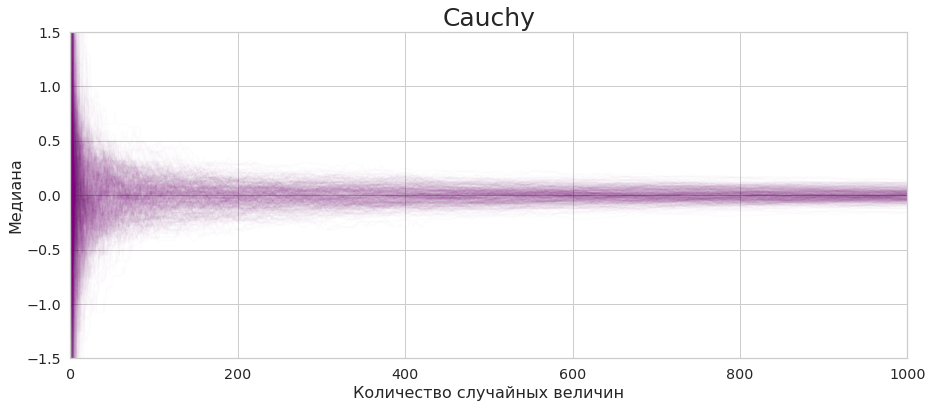

In [ ]:
size = 1000
samples_count = 500
sample = sps.cauchy.rvs(size=(samples_count, size))

cumulative_medians = []

def cumulat_median(x):
    cumulative_medians.append(x.expanding().median())

median = pd.DataFrame(sample)
median['median'] = median.apply(lambda x: cumulat_median(x), axis=1)

plt.figure(figsize=(15,6))

for i in range(samples_count):
   plt.plot(np.arange(size) + 1, cumulative_medians[i], color='purple', alpha=0.01)

plt.xlim((0, size))
plt.ylim((-1.5, 1.5))
axes = plt.gca()
axes.set_xlabel('Количество случайных величин', fontsize=16)
axes.set_ylabel('Медиана', fontsize=16)
plt.title('Cauchy', fontsize=25);



По графику видно, что при увеличении количества случайных величин выборочная медиана  стремится к истинной медиане.

**Вывод:**

Несмотря на то, что выборочная медиана стремится к истинной, для распределения Коши не выполняется ЗБЧ. Так как медиана никак не влияет на наличие "тяжелых" хвостов у этого распределения. Выборочные средние значения не стремятся к мат.ожиданию.


### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

In [ ]:
size = 1000
samples_count = 500
sample = sps.bernoulli(0.5).rvs(size=(samples_count, size))

means = sample.cumsum(axis=1) / (np.arange(size) + 1)




Найдем минимальное n, которое удовлетворяет условию:

In [ ]:
pre_measure = np.abs(means - 0.5).sum(axis=0) 
measure = pre_measure / samples_count 
r_m = np.where(measure <= 0.02)
r_m[0][0]

409

Проведем этот эксперимент 100 раз, так как нельзя делать вывод по 1му эксперименту:

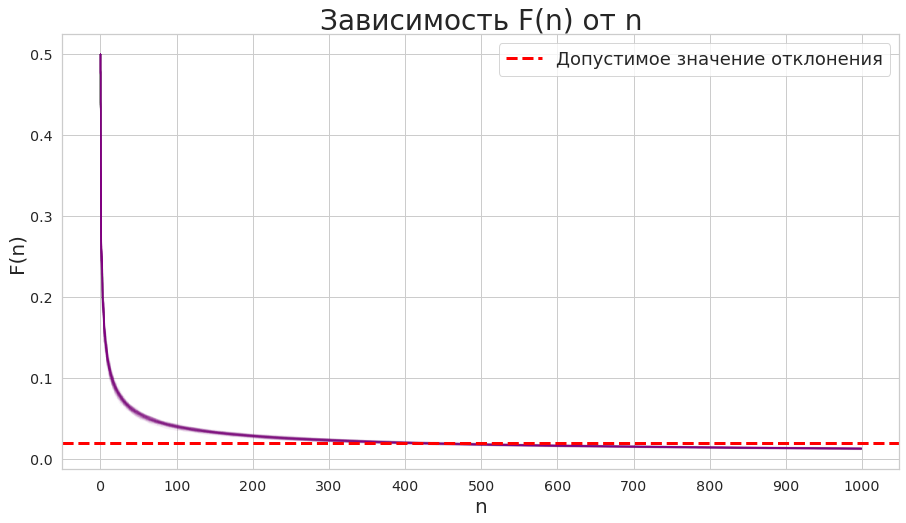

In [ ]:
plt.figure(figsize=(15,8))

for i in range(100):
  size = 1000
  samples_count = 500
  sample = sps.bernoulli(0.5).rvs(size=(samples_count, size))

  means = sample.cumsum(axis=1) / (np.arange(size) + 1)

  measure = (np.abs(means - 0.5).sum(axis=0)) / samples_count
  r_m = np.where(measure <= 0.02)
  plt.plot(np.arange(size), measure, color='purple', alpha=0.03)

plt.axhline(y=0.02, lw=3, ls='--', label='Допустимое значение отклонения', color='red')
x_ticks = range(0, 1001, 100)
plt.xticks(x_ticks)
plt.xlabel('n', fontsize=20)
plt.ylabel('F(n)', fontsize=20)
plt.title('Зависимость F(n) от n', fontsize=28)
plt.grid(True)
plt.legend(fontsize=18);

Визуализировали зависимость  𝐹(𝑛)  от  𝑛  в обычном масштабе. Можем заметить, что гиперболла и допустимое значение пересекаются где-то на отрезке [400, 500].

Для того чтобы увидеть пересечение, приблизим графики:

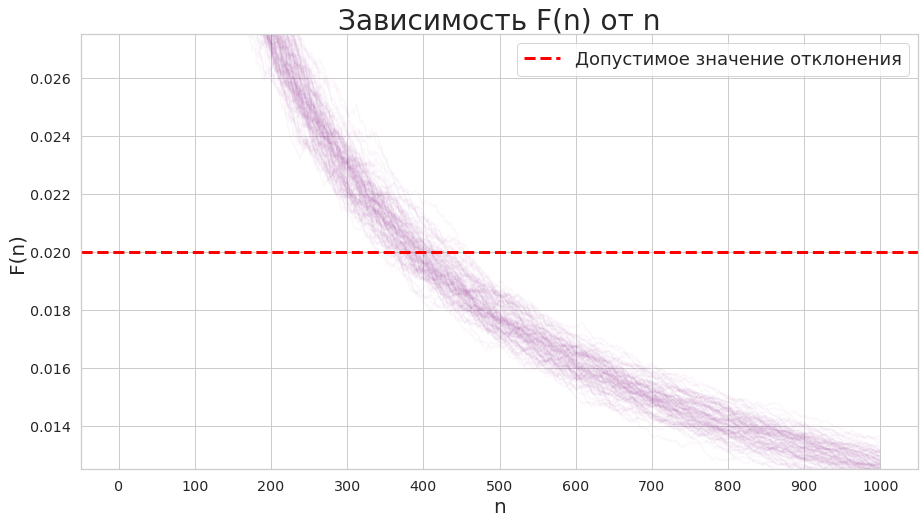

In [ ]:
plt.figure(figsize=(15,8))

for i in range(100):
  size = 1000
  samples_count = 500
  sample = sps.bernoulli(0.5).rvs(size=(samples_count, size))

  means = sample.cumsum(axis=1) / (np.arange(size) + 1)

  measure = (np.abs(means - 0.5).sum(axis=0)) / samples_count
  r_m = np.where(measure <= 0.02)
  plt.plot(np.arange(size), measure, color='purple', alpha=0.03)

plt.axhline(y=0.02, lw=3, ls='--', label='Допустимое значение отклонения', color='red')

plt.ylim([0.0125, 0.0275])
x_ticks = range(0, 1001, 100)
plt.xticks(x_ticks)
plt.xlabel('n', fontsize=20)
plt.ylabel('F(n)', fontsize=20)
plt.title('Зависимость F(n) от n', fontsize=28)
plt.grid(True)
plt.legend(fontsize=18);

По данному увеличению можем заметить, что графики пересекаются примерно в значении n=400. Значит, это наименьшее значение, удволетворяющее условиям( мера отклонения допустима).


Построим график в логарифмическом масштабе:

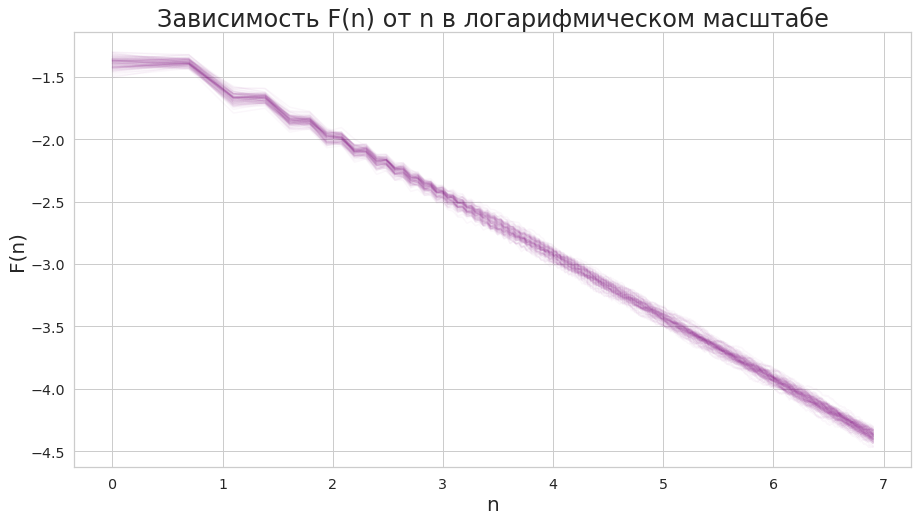

In [ ]:
plt.figure(figsize=(15,8))

for i in range(100):
  size = 1000
  samples_count = 500
  sample = sps.bernoulli(0.5).rvs(size=(samples_count, size))

  means = sample.cumsum(axis=1) / (np.arange(size) + 1)

  measure = (np.abs(means - 0.5).sum(axis=0)) / samples_count
  r_m = np.where(measure <= 0.02)
  plt.plot(np.log(np.arange(1, size)), np.log(measure[1:]), color='purple', alpha=0.03)



plt.xlabel('n', fontsize=20)
plt.ylabel('F(n)', fontsize=20)
plt.title('Зависимость F(n) от n в логарифмическом масштабе', fontsize=24)
plt.grid(True);

График в логарифмическом масштабе подтверждает, что график в обычном масштабе является гиперболой.

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

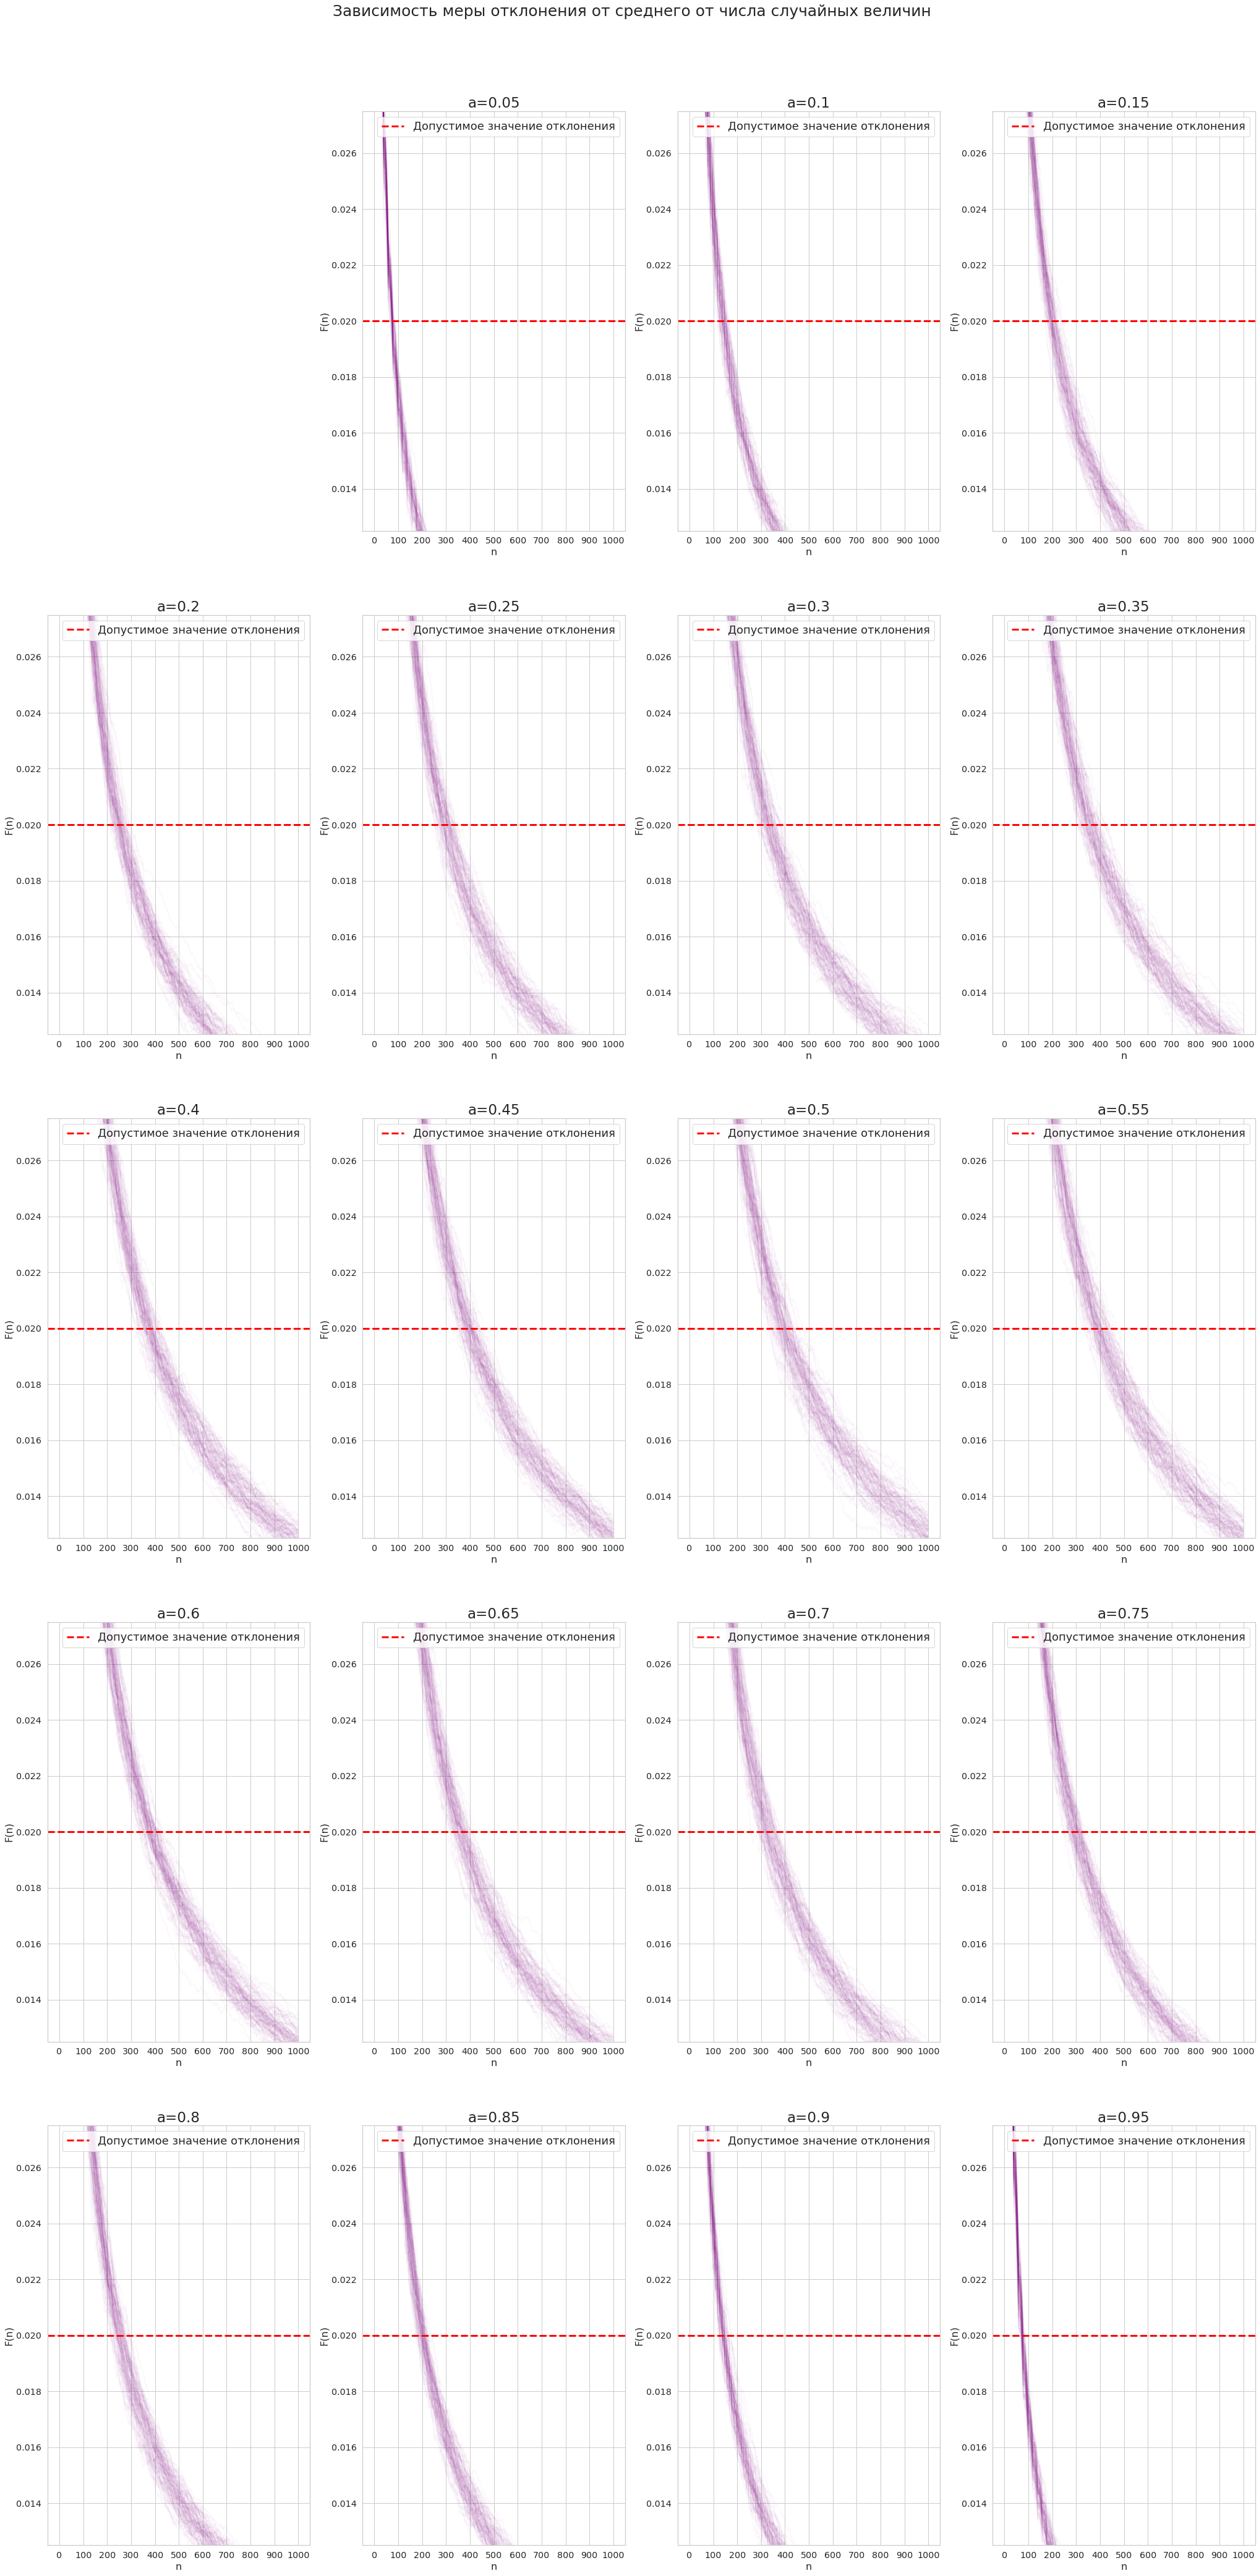

In [ ]:
plt.figure(figsize=(35, 80))
plt.suptitle('Зависимость меры отклонения от среднего от числа случайных величин', fontsize=25)

for a in np.arange(0.05, 1, 0.05):
  plt.subplot(6, 4, int(a * 20) + 1)
  for i in range(100):
    size = 1000
    samples_count = 500
    sample = sps.bernoulli(a).rvs(size=(samples_count, size))

    means = sample.cumsum(axis=1) / (np.arange(size) + 1)

    measure = (np.abs(means - a).sum(axis=0)) / samples_count
    r_m = np.where(measure <= 0.02)
    plt.plot(np.arange(size), measure, color='purple', alpha=0.03)

  plt.axhline(y=0.02, lw=3, ls='--', label='Допустимое значение отклонения', color='red')
  x_ticks = range(0, 1001, 100)
  plt.xticks(x_ticks)
  plt.xlabel('n', fontsize=16)
  plt.ylim([0.0125, 0.0275])
  plt.ylabel('F(n)', fontsize=16)
  plt.title(f'a={round(a, 3)}', fontsize=23)
  plt.grid(True)
  plt.legend(fontsize=18)

plt.subplots_adjust(top=0.95);


Можно заметить, что до значения а=0.5, минимальное значение n растет, после 0.5 начинает снова убывать.

Для того, чтобы это понять построим график изменения минимального значения n и a:

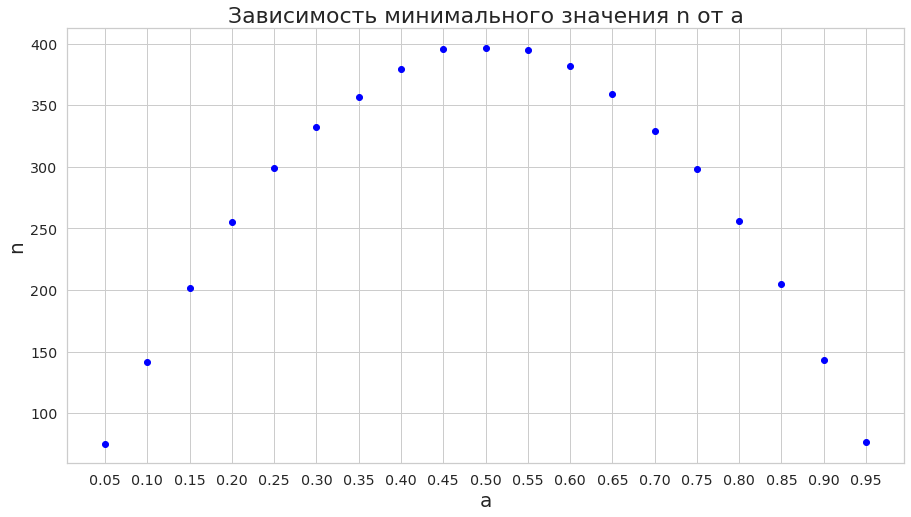

In [ ]:
meaning_n = []
for a in np.arange(0.05, 1, 0.05):
  mean_n = []
  for i in range(100):
    size = 1000
    samples_count = 500
    sample = sps.bernoulli(a).rvs(size=(samples_count, size))

    means = sample.cumsum(axis=1) / (np.arange(size) + 1)

    measure = (np.abs(means - a).sum(axis=0)) / samples_count
    r_m = np.where(measure <= 0.02)
    mean_n.append(r_m[0][0])
  meaning_n.append(np.sum(mean_n) / len(mean_n))
xticks = np.arange(0.05, 1, 0.05)
plt.figure(figsize=(15, 8))

x = []
for p in xticks:
  x.append(p)

for i in range(len(meaning_n)):
  plt.scatter(xticks[i], meaning_n[i], color='blue')

plt.xticks(xticks)
plt.xlabel('a', fontsize=20)
plt.ylabel('n', fontsize=20)
plt.title('Зависимость минимального значения n от a', fontsize=22);





**Выводы:**

Графиком зависимости минимального необходимого размера выборки от a(параметр распределения Бернулли) является парабола. При среднем значении случайной величины с точностью 0.02 пиком является значение a=0.5 и n~400.
При меньшем/большем значении а, выборка будет содержать меньше число случайных величин(СВ), но тогда количнство успехов и. неудач будет сильно разниться. Оптимально брать а=0.5, тогда выборка будет содержать примерно 400 СВ, но равно число у и н.
